<a href="https://colab.research.google.com/github/MaureenMbugua/CNNAudionClassification/blob/main/AudioClassification12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Author: Maureen Mbugua

#Exploratory Data Analysis

In [1]:
#Install libraries #librosa #librosa

In [2]:
!pip install librosa

In [3]:
#for displaying signal
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename='//NonverbalVocalization/NonverbalVocalization/2CVI_15_11_0_15_0_0_0.wav'

In [5]:
#for displaying graphs in a certain manner
import IPython.display as ipd
import librosa
import librosa.display

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/NonverbalVocalization.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/NonverbalVocalization') #Extracts the files into the /tmp folder
zip_ref.close()

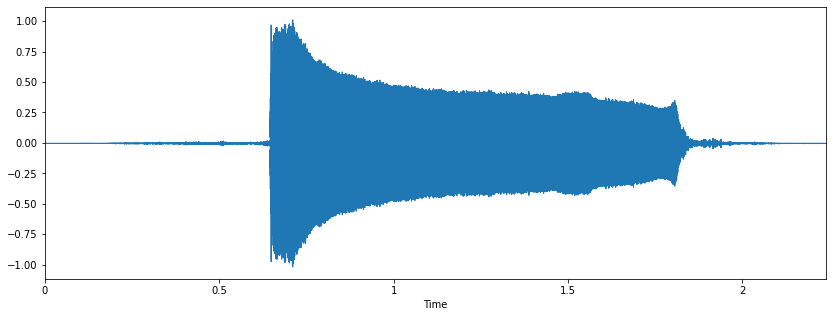

In [8]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)#gives two sets of info
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [9]:
sample_rate


22050

In [10]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [11]:
wave_sample_rate

16000

In [12]:
wave_audio

array([ 0,  0,  0, ..., 15, 15, 17], dtype=int16)

In [13]:
data

array([0.        , 0.        , 0.        , ..., 0.00044033, 0.00056158,
       0.00039001], dtype=float32)

In [14]:
import json
with open("/NonverbalVocalization/NonverbalVocalization/Nonverbal_Vocalization.json", "r") as read_file:
    mdata = json.load(read_file)

In [15]:
import pandas as pd

metadata=pd.read_csv("/NonverbalVocalization/NonverbalVocalization/Nonverbal_Vocalization.csv")
metadata.head()

,audfile_name,age,noise,sex,speakerID,class_ID,class_name
0,87LX_0_6_0_19_0_0_0.wav,19,0,0,87LX,0,teeth-chattering
1,4MYS_0_5_0_27_0_0_0.wav,27,0,0,4MYS,0,teeth-chattering
2,F8BC_0_6_0_14_0_0_0.wav,14,0,0,F8BC,0,teeth-chattering
3,TZCX_0_3_0_20_0_0_0.wav,20,0,0,TZCX,0,teeth-chattering
4,CTTJ_0_10_0_14_0_0_0.wav,14,0,0,CTTJ,0,teeth-chattering


#Data Pre-processing

In [16]:
#Extract Features for Classification
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
mfccs


array([[-5.3737079e+02, -5.3737079e+02, -5.3737079e+02, ...,
        -5.2416022e+02, -5.2323865e+02, -5.2497742e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8584249e+01,  1.9869776e+01,  1.7438576e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8291756e+01,  1.9524261e+01,  1.7175488e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.2395653e-01,  1.5370879e+00,  6.9571972e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.7662068e-01,  1.5612111e+00,  8.7277460e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.2437663e-01,  1.5261453e+00,  9.9874914e-01]], dtype=float32)

In [17]:
#Extracting MFCC's for every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/NonverbalVocalization/NonverbalVocalization'
metadata.head(10)

,audfile_name,age,noise,sex,speakerID,class_ID,class_name
0,87LX_0_6_0_19_0_0_0.wav,19,0,0,87LX,0,teeth-chattering
1,4MYS_0_5_0_27_0_0_0.wav,27,0,0,4MYS,0,teeth-chattering
2,F8BC_0_6_0_14_0_0_0.wav,14,0,0,F8BC,0,teeth-chattering
3,TZCX_0_3_0_20_0_0_0.wav,20,0,0,TZCX,0,teeth-chattering
4,CTTJ_0_10_0_14_0_0_0.wav,14,0,0,CTTJ,0,teeth-chattering
5,VVBA_0_4_0_23_0_0_0.wav,23,0,0,VVBA,0,teeth-chattering
6,CNWF_0_3_0_20_0_0_0.wav,20,0,0,CNWF,0,teeth-chattering
7,O5E1_0_6_1_29_0_0_0.wav,29,0,1,O5E1,0,teeth-chattering
8,5AG3_0_3_1_18_0_0_0.wav,18,0,1,5AG3,0,teeth-chattering
9,OI67_0_2_1_22_0_0_0.wav,22,0,1,OI67,0,teeth-chattering


In [18]:
#creating a feature extractor function
#loads the audio file, extracts features and finds scaled features by finding mean of transpose of value of mfcc features
 
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [19]:
#iterating through every audio file and extracting features
import numpy as np
from tqdm import tqdm

extracted_features=[] #list to store the features and class label
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["class_name"])+'/', str(row["audfile_name"]))
    final_class_labels = row["class_name"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels]) #our dependent and independent features, later converted into a dataframe

727it [00:30, 23.79it/s]


In [20]:
#converting the features into a Pandas dataframe

extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(20)

,feature,class
0,"[-596.0521, 46.280857, 21.179968, 21.595993, 1...",teeth-chattering
1,"[-430.47748, 165.47548, -19.052588, 2.3916497,...",teeth-chattering
2,"[-490.7734, 108.566605, -22.723782, 39.0963, -...",teeth-chattering
3,"[-501.74335, 143.3307, 2.2156296, 18.220789, -...",teeth-chattering
4,"[-514.83105, 145.79393, -28.424004, 60.687637,...",teeth-chattering
5,"[-627.4276, 126.80181, -38.632298, 49.74178, -...",teeth-chattering
6,"[-680.6681, 82.789894, -11.279946, 47.058838, ...",teeth-chattering
7,"[-534.5318, 183.14403, 51.81739, 41.85067, -2....",teeth-chattering
8,"[-646.11005, 110.1571, -18.720848, 54.75976, -...",teeth-chattering
9,"[-543.9393, 139.39474, -15.06812, 37.28891, -1...",teeth-chattering


In [21]:
#split into independent and dependent dataset
X = np.array(extracted_features_df["feature"].tolist()) #convert series to list then array
Y = np.array(extracted_features_df["class"].tolist())
Y.shape

(727,)

In [22]:
#Label encoding
#split
y = np.array(pd.get_dummies(Y))
y.shape


(727, 16)

#Splitting the Dataset


In [23]:
#train test validation split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=0)

In [24]:
X_train = X_train[..., np.newaxis]
X_train.shape

(522, 40, 1)

In [25]:
X_val = X_val[..., np.newaxis]
X_val.shape

(59, 40, 1)

In [26]:
y_train.shape

(522, 16)

In [27]:
X_test = X_test[..., np.newaxis]
X_test.shape

(146, 40, 1)

# Model Creation

In [29]:
import tensorflow as tf

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras import regularizers
from sklearn import metrics

In [31]:
num_labels=y.shape[1]

In [52]:
#Create CNN model
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = Sequential()

#1st convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(BatchNormalization())

#2nd convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(BatchNormalization())


#flatten output and feed to dense layer
model.add(Flatten())
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(num_labels, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 40, 1, 32)         320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 1, 32)        0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 20, 1, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 1, 32)         9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 1, 32)        0         
 2D)                                                             
                                                      

#Training Model

In [54]:
optimiser = Adam(learning_rate=0.0001)
test_acc=71.2456
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
## Trianing my model
num_epochs = 400
num_batch_size = 32

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=num_batch_size, epochs=num_epochs, verbose=1)




Epoch 1/400
17/17 [==============================] - 1s 20ms/step - loss: 3.5833 - accuracy: 0.0517 - val_loss: 3.4306 - val_accuracy: 0.0339
Epoch 2/400
17/17 [==============================] - 0s 9ms/step - loss: 3.2526 - accuracy: 0.0977 - val_loss: 3.1878 - val_accuracy: 0.0508
Epoch 3/400
17/17 [==============================] - 0s 9ms/step - loss: 3.0170 - accuracy: 0.1245 - val_loss: 3.0666 - val_accuracy: 0.0508
Epoch 4/400
17/17 [==============================] - 0s 10ms/step - loss: 2.9064 - accuracy: 0.1456 - val_loss: 2.9872 - val_accuracy: 0.0847
Epoch 5/400
17/17 [==============================] - 0s 9ms/step - loss: 2.7998 - accuracy: 0.1858 - val_loss: 2.9303 - val_accuracy: 0.1017
Epoch 6/400
17/17 [==============================] - 0s 10ms/step - loss: 2.7469 - accuracy: 0.2126 - val_loss: 2.8780 - val_accuracy: 0.0847
Epoch 7/400
17/17 [==============================] - 0s 9ms/step - loss: 2.6187 - accuracy: 0.2433 - val_loss: 2.8236 - val_accuracy: 0.1356
Epoch 8/40

In [ ]:
# evaluate model on test set
test_loss, testr_acc = model.evaluate(X_test, y_test, verbose=2)

In [50]:
print('\nTest accuracy:', test_acc)


Test accuracy: 71.2456


In [37]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

In [39]:
# pick a sample to predict from the test set
X_to_predict = X_test[2]
y_to_predict = y_test[2]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0], Predicted label: [2]


In [54]:
#Save Model
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [55]:
#convert to tensorflowlite
converter = tf.lite.TFLiteConverter.from_saved_model("my_model") 
tflite_model = converter.convert()



In [56]:
with open('my_classification_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [58]:
pip install tflite-support

     |████████████████████████████████| 1.1 MB 5.3 MB/s 
     |████████████████████████████████| 210 kB 50.1 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0


In [59]:
#add metadata
from tflite_support.metadata_writers import audio_classifier
from tflite_support.metadata_writers import metadata_info
from tflite_support.metadata_writers import writer_utils

In [ ]:
AudioClassifierWriter = audio_classifier.MetadataWriter
_MODEL_PATH = "my_classification_model.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "my_classification_model_labels.txt"
# Expected sampling rate of the input audio buffer.
_SAMPLE_RATE = 16000
# Expected number of channels of the input audio buffer. Note, Task library only
# support single channel so far.
_CHANNELS = 1
_SAVE_TO_PATH = "my_classification_model_metadata.tflite"

# Create the metadata writer.
writer = AudioClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), _SAMPLE_RATE, _CHANNELS, [_LABEL_FILE])

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)